Time series will come to picture in ML, when we have to make predictions over a period of time.

eg: House price next year, sales next month, etc

Features of time series we can look at:

1. Trend (Upward, Downward, etc)
2. Seasonality (on particular season its showing particular trend)
3. Irregular component (The difference or error cannot be explained by the algorithm)
4. Cyclical component (Algorithm may not be able to predict as it can come once in a while)


### To predict the accuracy of algorithms related to time series

1. Mean Absolute Error (MAE)

MAE  =  ∑|Yactual - Ypredicted|/n     (Sigma of Absolute value of modulus of Y actuals minus Ypredicted divided by count)

2. Mean Absolute Percentage Error (MAPE)

MAPE = ((1/n * ∑|Yactual - Ypredicted|)/Yactual)*100%

3. Mean Squared Error (MSE)

MSE  =  (∑(Yactual - Ypredicted)^2)/n

4. Root Mean Squared Error (RMSE)

RMSE  =  sqrt(∑(Yactual - Ypredicted)^2)/n

5. AIC

6. BIC

All above 6 values should be less for the model tobe good.


## Models going to discuss here

1. AR (Auto Regressive)

2. MA (Moving Average)

3. ARMA (Auto Regressive Moving Average)

4. ARIMA


###### To decide which algorithm to apply
If Time series is stationary we can apply AR, MA or ARMA models. If Time series is not stationary, then we can apply ARIMA model.

###### To know if the time series is stationary
There is a statistical test known as Augmented Dickey Fuller Test (ADF Test). This test confirms if time series is stationary or not with Null Hypothysis (Ho) which is Time series is not stationary or Alternate Hypothysis (Ha) which is Time series is stationary.

Parameter to check  ADF Test is P-Value :
If P-value is greater than 0.05, we can go with null hypothysis (Time series is not stationary), else go with alternate hypothysis.

If our time series is not stationary, we can try to make it stationary with DIFFERENCING. Here we will generate a new time series with substracting each value with its previous value. Then apply ADF test on new time series. If the P-value is still more than 0.05, we can generate a new time series with differencing once again from newly generated time series.
Like this on what level of differencing, the time series will become stationary, that value is known as 'd'. 
In below example is 'Second Differene Time series' is stationary , then d=2.

In [1]:
import pandas as pd

differ = pd.read_csv(r'C:\Users\sreeraj.va\Documents\differencing.csv')

In [2]:
differ

#example for differencial time series

,Time,Revenue,First Differene Time series,Second Differene Time series
0,T1,45,NaN,NaN
1,T2,54,9.0,NaN
2,T3,56,2.0,-7.0
3,T4,76,20.0,18.0
4,T5,54,-22.0,-42.0
5,T6,43,-11.0,11.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv(r'D:\E\Courses\Edureka\airline_passengers.csv')

In [5]:
df

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
# converting month to datetime format

df['Month'] = pd.to_datetime(df['Month'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
pd.__version__

'1.0.1'

In [10]:
#making month column as index

df.set_index('Month', inplace=True)

In [11]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


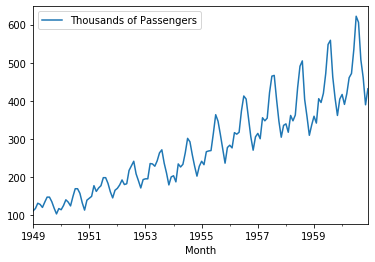

In [12]:
df.plot()

###### seasonal_decompose to know trend, seasonal, residual

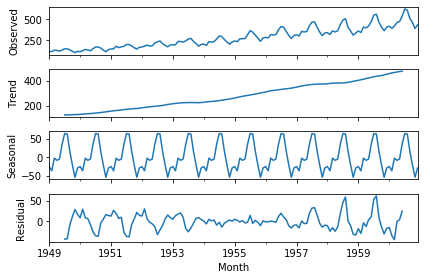

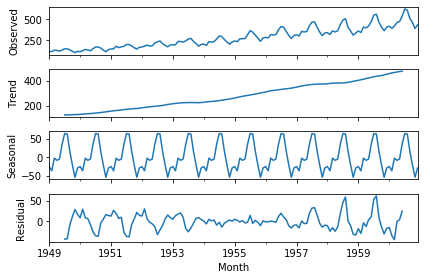

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Thousands of Passengers'])
decomposition.plot()

###### adfuller to know if time series is stationary

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adfuller(df['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

P-Value is 0.9918802434376411

In [18]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test Result')
    print('-----------------------------------')
    labels = ['ADF Test Statistic', 'P-Value', '#Lags', 'No of observations']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print('Time series is stationary')
    else:
        print('Time series is not stationary')

In [19]:
adf_check(df['Thousands of Passengers'])

Augmented Dickey Fuller Test Result
-----------------------------------
ADF Test Statistic : 0.8153688792060543
P-Value : 0.9918802434376411
#Lags : 13
No of observations : 130
Time series is not stationary


In [20]:
df['Thousands of Passengers 1st diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [21]:
df

,Thousands of Passengers,Thousands of Passengers 1st diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [23]:
adf_check(df['Thousands of Passengers 1st diff'].dropna())

Augmented Dickey Fuller Test Result
-----------------------------------
ADF Test Statistic : -2.8292668241700034
P-Value : 0.054213290283824954
#Lags : 12
No of observations : 130
Time series is not stationary


Still P-value is greater than 0.05. Its still not stationary.

In [24]:
df['Thousands of Passengers 2nd diff'] = df['Thousands of Passengers 1st diff'] - df['Thousands of Passengers 1st diff'].shift(1)

In [25]:
df

,Thousands of Passengers,Thousands of Passengers 1st diff,Thousands of Passengers 2nd diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [27]:
adf_check(df['Thousands of Passengers 2nd diff'].dropna())

Augmented Dickey Fuller Test Result
-----------------------------------
ADF Test Statistic : -16.384231542468488
P-Value : 2.7328918500143186e-29
#Lags : 11
No of observations : 130
Time series is stationary


Now P-value is less than 0.05. Now time series is stationary with second differencing. 

d=2

###### seasonal_decompose for checking seasonality

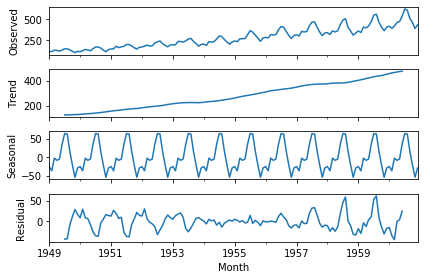

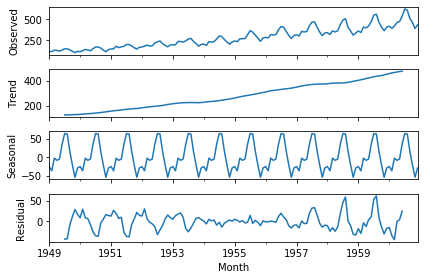

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Thousands of Passengers'])
decomposition.plot()

For AR model we have to calculate p value (Not the earlier P-value). This p value refers to how many previous days are important to predict.

Equation for AR (Auto Regressor) model:
Y(t+1) = β1Yt + β2Y(t-1) + …........+ Error

p value will decide how many days or months or time periods are important for prediction.

To find p value (how many periods are important):     PACF (Partial Auti Correlation Function) will help. PACF will plot a graph and we can see how many events are greater than 0.5 (Impacting the prediction). That will be the p value.


###### plot_pacf for finding p value

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


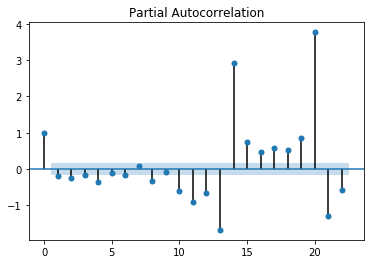

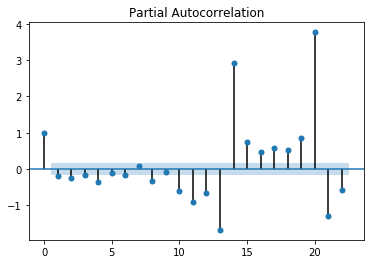

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df['Thousands of Passengers 2nd diff'].dropna())

p value is zero as there is no correlation with previous values (all nearest values are less than 0.5)

###### logic for which model to select (now we found p, d values)

In [ ]:
AR              I              MA
p=0            d=2             q
P               D              Q

In [31]:
#Equation using to find MA values

'Y(t+1) = α1*Et + α2*E(t-1) + ....... + Mean'

'Y(t+1) = α1*Et + α2*E(t-1) + ....... + Mean'

q value:
How many days error is valid to do the prediction. to find this we can use ACF (Auto Correlation Function).

###### plot_acf to find q value

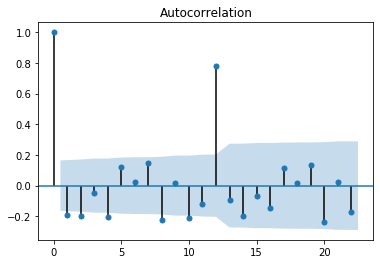

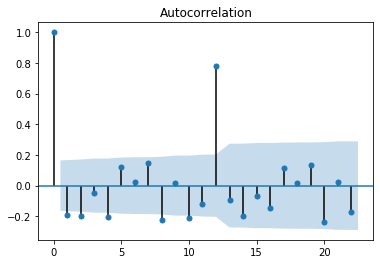

In [32]:
plot_acf(df['Thousands of Passengers 2nd diff'].dropna())

In [ ]:
AR              I              MA
p=0            d=2            q=0    #related to trend
P               D              Q     # related to seasonality

In [34]:
df['seasonal_difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [35]:
df

,Thousands of Passengers,Thousands of Passengers 1st diff,Thousands of Passengers 2nd diff,seasonal_difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [36]:
adf_check(df['seasonal_difference'].dropna())


# P-value is less than 0.05, so D=1

Augmented Dickey Fuller Test Result
-----------------------------------
ADF Test Statistic : -3.3830207264924805
P-Value : 0.011551493085514982
#Lags : 1
No of observations : 130
Time series is stationary


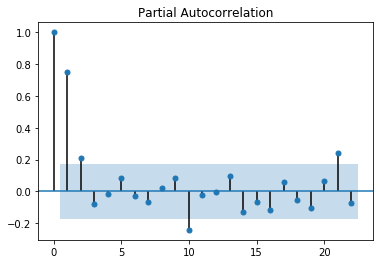

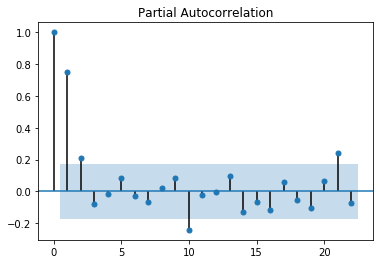

In [37]:
plot_pacf(df['seasonal_difference'].dropna())

# P is 1

In [ ]:
AR              I              MA
p=0            d=2            q=0    #related to trend
P=1            D=1              Q     # related to seasonality

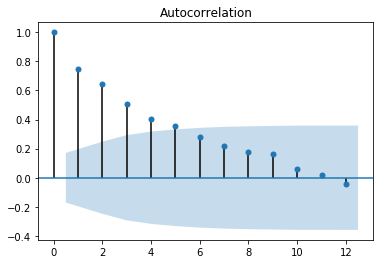

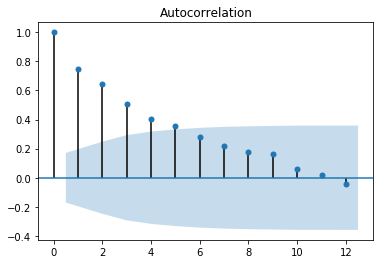

In [39]:
plot_acf(df['seasonal_difference'].dropna(), lags=12)

3 previous months are important, Q=3

In [ ]:
AR              I              MA
p=0            d=2            q=0     # related to trend
P=1            D=1            Q=3     # related to seasonality

In [ ]:
# so we have to run ARIMA model

ARIMA(0,2,0)(1,1,3)

In [40]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [41]:
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order=(0,2,0), seasonal_order=(1,1,3,12))

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [42]:
results = model.fit()

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [43]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 2, 0)x(1, 1, 3, 12)   Log Likelihood                -570.082
Date:                            Sat, 07 Mar 2020   AIC                           1150.163
Time:                                    17:30:08   BIC                           1164.501
Sample:                                01-01-1949   HQIC                          1155.989
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0409      0.997     -0.041      0.967      -1.995       1.913
ma.S.L12      -0.2118      1.003   

In [47]:
df['forcast'] = results.predict(start=130, end=144, dynamic=True)

In [48]:
df

,Thousands of Passengers,Thousands of Passengers 1st diff,Thousands of Passengers 2nd diff,seasonal_difference,forcast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0,479.536950
1960-09-01,508,-98.0,-82.0,45.0,376.256240
1960-10-01,461,-47.0,51.0,54.0,314.149945


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

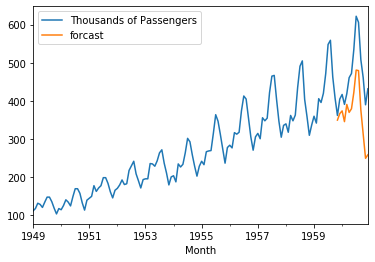

In [52]:
df[['Thousands of Passengers', 'forcast']].plot()

# prediction is not accurate

In [72]:
# trying with order (1,2,1) instead of (0,2,0)

model2 = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order=(1,2,1), seasonal_order=(1,2,3,12))
results2 = model2.fit()
print(results2.summary())

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 2, 3, 12)   Log Likelihood                -466.893
Date:                            Sat, 07 Mar 2020   AIC                            947.786
Time:                                    17:46:29   BIC                            967.180
Sample:                                01-01-1949   HQIC                           955.661
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4149      0.082     -5.089      0.000      -0.575      -0.255
ma.L1         -0.9970      0.852   

In [73]:
df['forcast3'] = results2.predict(start=130, end=144, dynamic=True)

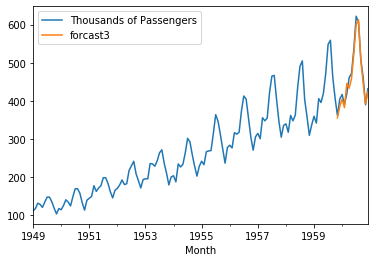

In [74]:
df[['Thousands of Passengers', 'forcast3']].plot()

#predictiona are much better

In [75]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(24)]

In [76]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [78]:
future_date_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [79]:
future_date_df.head()

,Thousands of Passengers,Thousands of Passengers 1st diff,Thousands of Passengers 2nd diff,seasonal_difference,forcast,forcast2,forcast3
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
future_df = pd.concat([df, future_date_df])

In [81]:
future_df

,Thousands of Passengers,Thousands of Passengers 1st diff,Thousands of Passengers 2nd diff,seasonal_difference,forcast,forcast2,forcast3
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


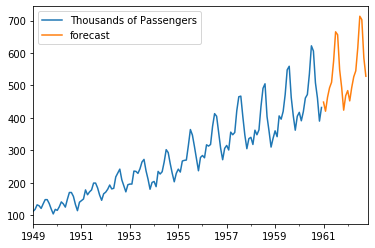

In [84]:
future_df['forecast'] = results2.predict(start=144, end=165, dynamic=True)
future_df[['Thousands of Passengers', 'forecast']].plot()